In [1]:
import torch
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn

In [3]:
# 读取数据
data_path = r"F:\Data\BikeData.csv"
rides = pd.read_csv(data_path)
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# 类型变量的独热编码
dummy_fields = ['season','weathersit','mnth','hr','weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each],prefix=each,drop_first=False)
    rides = pd.concat([rides,dummies],axis=1)
fields_to_drop = ['instant','dteday','season','weathersit','weekday','atemp','mnth','workingday','hr']
data = rides.drop(fields_to_drop,axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# 对于数值类型进行标准化
quant_features = ['cnt','temp','hum','windspeed']
scaled_features = {}
for each in quant_features:
    mean,std = data[each].mean(),data[each].std()
    scaled_features[each] = [mean,std]
    data.loc[:,each] = (data[each]-mean)/std

In [6]:
print(data['hum'][:10])

0    0.945879
1    0.895683
2    0.895683
3    0.644700
4    0.644700
5    0.644700
6    0.895683
7    1.196862
8    0.644700
9    0.694896
Name: hum, dtype: float64


In [7]:
rides['hum'][:10]

0    0.81
1    0.80
2    0.80
3    0.75
4    0.75
5    0.75
6    0.80
7    0.86
8    0.75
9    0.76
Name: hum, dtype: float64

In [8]:
# 分割数据
test_data = data[-21*24:]
train_data = data[:-21*24]
print('test data:',len(test_data),'\ntrain data:',len(train_data))

# 目标（数据）列
target_fields = ['cnt','casual','registered']
features,targets = train_data.drop(target_fields,axis=1),train_data[target_fields]
test_features,test_targets = test_data.drop(target_fields,axis=1),test_data[target_fields]

# 将数据从pandas framework 转化到 numpy
X = features.values
Y = targets['cnt'].values
Y = Y.astype(float)

Y = np.reshape(Y,[len(Y),1])

test data: 504 
train data: 12942


In [9]:
features.head()

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.283786,0.945879,-1.573901,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.385993,0.895683,-1.573901,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.385993,0.895683,-1.573901,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.283786,0.644700,-1.573901,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.283786,0.644700,-1.573901,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [10]:
X[:1]

array([[ 0.        ,  0.        , -1.28378626,  0.94587904, -1.57390143,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]])

In [12]:
features.shape

(12942, 56)

In [11]:
# features.shape[1]个输入层，10个隐藏层，1个输出层 的 nn
input_size = features.shape[1]
hidden_size = 10
output_size = 1
batch_size = 100
w1 = torch.randn([input_size,hidden_size],dtype=torch.double,requires_grad=True)
b = torch.randn([hidden_size],dtype=torch.double,requires_grad=True)
w2 = torch.randn([hidden_size,output_size],dtype=torch.double,requires_grad=True)
# 手动编写神经网络架构
def neu(x):
    hidden = x.mm(w1) + b.expand(x.size()[0],hidden_size)
    hidden = torch.sigmoid(hidden)
    output = hidden.mm(w2)
    return output
def cost(x,y):
    error = torch.mean((x-y)**2)
    return error
def zero_grad():
    if w1.grad is not None and b.grad is not None and w2.grad is not None:
        w1.grad.data.zero_()
        b.grad.data.zero_()
        w2.grad.data.zero_()
def optimizer_step(learning_rate):
    w1.data.add_(- learning_rate * w1.grad.data)
    b.data.add_(- learning_rate * b.grad.data)
    w2.data.add_(- learning_rate * w2.grad.data)        

In [12]:
losses = []
for i in range(1000):
    batch_loss = []
    for start in range(0,len(X),batch_size):
        end = start + batch_size if start + batch_size < len(X) else len(X)
        xx = torch.tensor(X[start:end],dtype=torch.double,requires_grad=True)
        yy = torch.tensor(Y[start:end],dtype=torch.double,requires_grad=True)
        predict = neu(xx)
        loss = cost(predict,yy)
        zero_grad()
        loss.backward()
        optimizer_step(0.001)
        batch_loss.append(loss.data.numpy())
        
    if i % 100 == 0:
        losses.append(np.mean(batch_loss))
        print(i,np.mean(batch_loss))    

0 2.426526450736821
100 0.6687441280313506
200 0.5885058525791108
300 0.5312228520576591
400 0.4825461108928089
500 0.44028478392295545
600 0.40423592652620755
700 0.37447842311379254
800 0.35052091706706945
900 0.33134290162251756


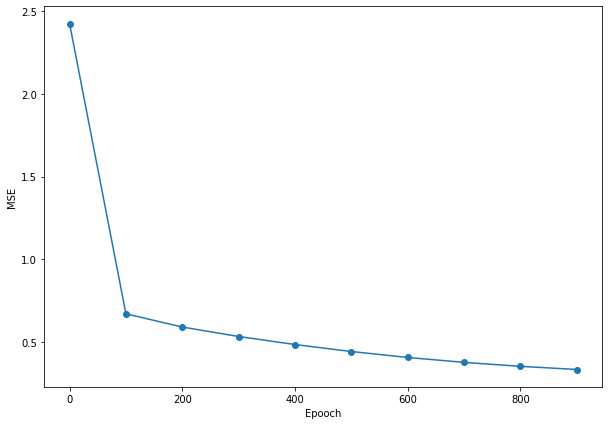

In [13]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(len(losses))*100,losses,'o-')
plt.xlabel('Epooch')
plt.ylabel('MSE')
plt.show()

In [14]:
# pytorch
input_size = features.shape[1]
hidden_size = 10
output_size = 1
batch_size = 150
neu = torch.nn.Sequential(torch.nn.Linear(input_size,hidden_size),
                         torch.nn.Sigmoid(),
                         torch.nn.Linear(hidden_size,output_size))
cost = torch.nn.MSELoss()
optimizer = optim.SGD(neu.parameters(),lr=0.01)

In [15]:
losses = []
for i in range(1000):
    batch_loss = []
    for start in range(0,len(X),batch_size):
        end = start + batch_size if start + batch_size < len(X) else len(X)
        xx = torch.tensor(X[start:end],dtype=torch.float,requires_grad=True)
        yy = torch.tensor(Y[start:end],dtype=torch.float,requires_grad=True)
        predict = neu(xx)
        loss = cost(predict,yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.data.numpy())
    if i % 100 == 0:
        losses.append(np.mean(batch_loss))
        print(i,'Loss:',np.mean(batch_loss))

0 Loss: 0.9215694
100 Loss: 0.28213507
200 Loss: 0.26305428
300 Loss: 0.23975094
400 Loss: 0.20481306
500 Loss: 0.15965077
600 Loss: 0.12257515
700 Loss: 0.10014648
800 Loss: 0.08613571
900 Loss: 0.07604655


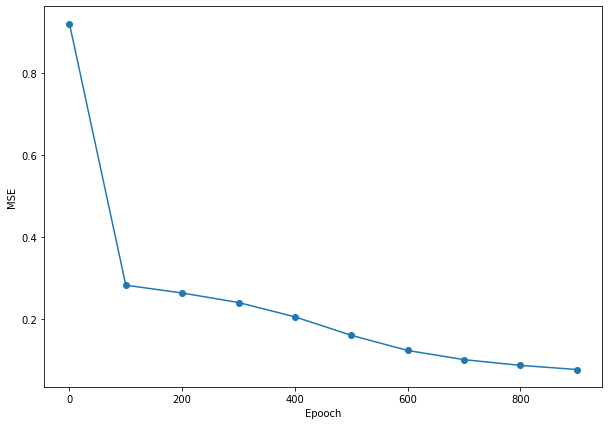

In [16]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(len(losses))*100,losses,'o-')
plt.xlabel('Epooch')
plt.ylabel('MSE')
plt.show()

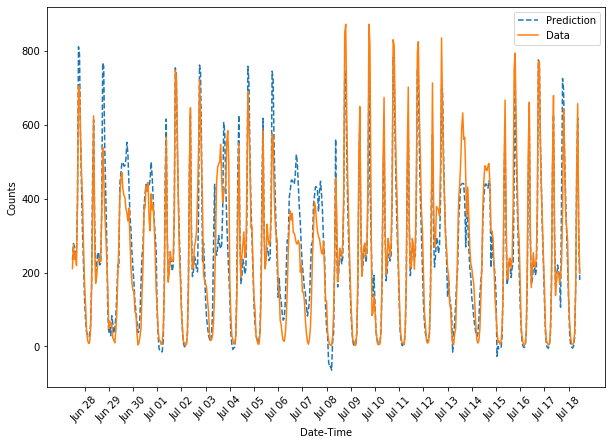

In [17]:
# 测试神经网络
targets = test_targets['cnt']
targets = targets.values.reshape([len(targets),1])
targets = targets.astype(float)

x = torch.tensor(test_features.values,dtype=torch.float,requires_grad=True)
y = torch.tensor(targets,dtype=torch.float,requires_grad=True)
# print(x[:10])
pred = neu(x)
pred = pred.data.numpy()
# print((pred * std + mean)[:10])

fig,ax = plt.subplots(figsize=(10,7))
mean,std = scaled_features['cnt']
ax.plot(pred * std + mean,label='Prediction',linestyle='--')
ax.plot(targets * std + mean,label='Data',linestyle='-')
ax.legend()
ax.set_xlabel('Date-Time')
ax.set_ylabel('Counts')
dates = pd.to_datetime(rides.loc[test_data.index]['dteday'])
dates = dates.apply(lambda d : d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24],rotation=45)